# Wrangle   
start with mall_customers database
    - acquire: verify our acquire module is working  
    - summarize our data
    - plot histograms and boxplots   
    - nulls   
    - outliers   
    - astype()   
    - pd.cut()   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import acquire


In [2]:
df = acquire.get_mall_data()

## Summarize

In [3]:
df.shape

(200, 5)

In [4]:
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.dtypes

customer_id        int64
gender            object
age                int64
annual_income      int64
spending_score     int64
dtype: object

**Takeways**   
1. encode gender   
2. drop customer_id   
3. define our target variable: spending_score.  

In [6]:
df.gender.value_counts()

Female    112
Male       88
Name: gender, dtype: int64

In [7]:
df.describe()

,customer_id,age,annual_income,spending_score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


**Questions**
1. How is annual income computed? or what units is it in?   
2. What does spending score mean?   
3. Is higher score more likely to spend so would be better to market to?   


## Plot Distiributions

In [8]:
df.columns

Index(['customer_id', 'gender', 'age', 'annual_income', 'spending_score'], dtype='object')

#### Histograms

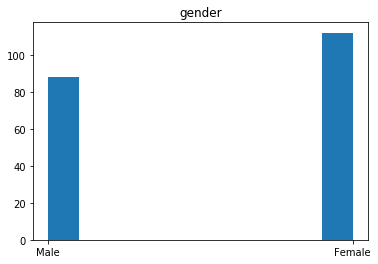

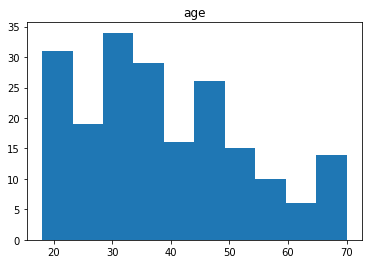

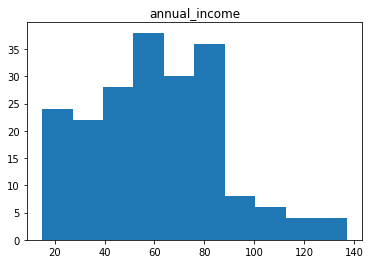

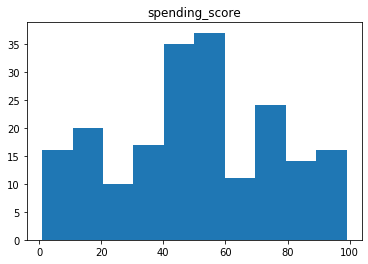

In [9]:
for col in ['gender', 'age', 'annual_income', 'spending_score']:
    plt.hist(df[col])
    plt.title(col)
    plt.show()

#### Boxplots

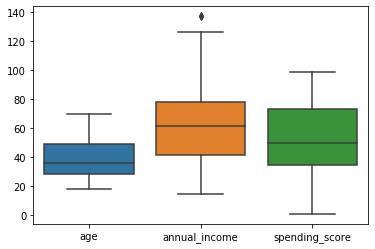

In [10]:
sns.boxplot(data=df[['age', 'annual_income', 'spending_score' ]])

In [11]:
df.isna().sum()

customer_id       0
gender            0
age               0
annual_income     0
spending_score    0
dtype: int64

nulls, outliers, cut, dropna, fillna, replace, get_dummies ( think about if any new features to compute) train, validate, test split update prepare.py file to make necessary changes

**Cutting/Binning** turns continuous variable into a categorical one

- 'pd.cut' creates bins of equal value
- 'pd.qcut' creates bins with the same number of observations

In [12]:
pd.cut(df.age, bins=4).value_counts()

(17.948, 31.0]    70
(31.0, 44.0]      61
(44.0, 57.0]      43
(57.0, 70.0]      26
Name: age, dtype: int64

In [13]:
pd.qcut(df.age, 4).value_counts()

(28.75, 36.0]      54
(36.0, 49.0]       51
(17.999, 28.75]    50
(49.0, 70.0]       45
Name: age, dtype: int64

In [14]:
pd.cut(df.age, bins=[0, 30, 50, 100]).value_counts()

(30, 50]     98
(0, 30]      62
(50, 100]    40
Name: age, dtype: int64

In [15]:
# pd.cut?

In [16]:
df['is_female'] = (df.gender == 'Female').astype('int')

In [17]:
df.head()

,customer_id,gender,age,annual_income,spending_score,is_female
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
train_and_validate, test = train_test_split(df, test_size=.15, random_state=123)
train, validate = train_test_split(train_and_validate, test_size=.15, random_state=123)
print('train', train.shape)
print('validate', validate.shape)
print('test', test.shape)

train (144, 6)
validate (26, 6)
test (30, 6)


In [20]:

def prep_mall_data(df):
    """
    This function takes acquired mall data, completes the prep
    and splits the data into train, validate, and test datasets
    """
    df['is_female'] = (df.gender == 'Female').astype('int')
    train_and_validate, test = train_test_split(df, test_size=.15, random_state=123)
    train, validate = train_test_split(train_and_validate, test_size=.15, random_state=123)
    return train, validate, test

# Acquistion and Prep Exercises

Throughout the exercises for Regression in Python lessons, you will use the following example scenario: As a customer analyst, I want to know who has spent the most money with us over their lifetime. I have monthly charges and tenure, so I think I will be able to use those two attributes as features to estimate total_charges. I need to do this within an average of $5.00 per customer.


The first step will be to acquire and prep the data. Do your work for this exercise in a file named wrangle.py.

1. Acquire customer_id, monthly_charges, tenure, and total_charges from telco_churn database for all customers with a 2 year contract.
2. Walk through the steps above using your new dataframe. You may handle the missing values however you feel is appropriate.
3. End with a python file wrangle.py that contains the function, wrangle_telco(), that will acquire the data and return a dataframe cleaned with no missing values.

In [21]:
# 1. Acquire customer_id, monthly_charges, tenure, and total_charges from telco_churn database for 
# all customers with a 2 year contract.
import wrangle

In [22]:
df = wrangle.get_telco2yr_data()

In [23]:
# 2. Walk through the steps above using your new dataframe. 
# You may handle the missing values however you feel is appropriate
df.head()

,customer_id,monthly_charges,tenure,total_charges
0,0013-SMEOE,109.70,71,7904.25
1,0014-BMAQU,84.65,63,5377.8
2,0016-QLJIS,90.45,65,5957.9
3,0017-DINOC,45.20,54,2460.55
4,0017-IUDMW,116.80,72,8456.75


In [24]:
df.isna().sum()

customer_id        0
monthly_charges    0
tenure             0
total_charges      0
dtype: int64

In [25]:
df.dtypes

customer_id         object
monthly_charges    float64
tenure               int64
total_charges       object
dtype: object

In [26]:
df.total_charges = df.total_charges.str.replace(' ', '0').astype(float)

In [27]:
df.isna().sum()

customer_id        0
monthly_charges    0
tenure             0
total_charges      0
dtype: int64

In [28]:
df.dtypes

customer_id         object
monthly_charges    float64
tenure               int64
total_charges      float64
dtype: object

In [29]:
df.describe()

,monthly_charges,tenure,total_charges
count,1695.000000,1695.000000,1695.000000
mean,60.770413,56.735103,3706.934336
std,34.678865,18.209363,2579.517834
min,18.400000,0.000000,0.000000
25%,24.025000,48.000000,1269.675000
50%,64.350000,64.000000,3593.800000
75%,90.450000,71.000000,5988.800000
max,118.750000,72.000000,8672.450000


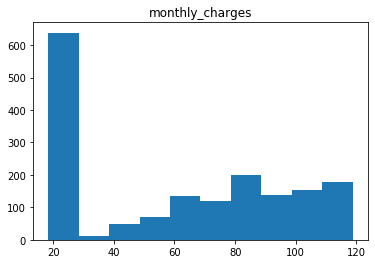

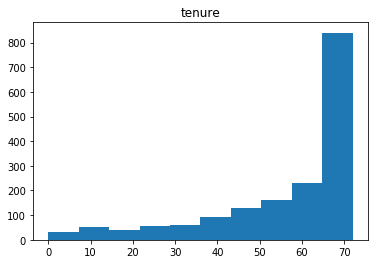

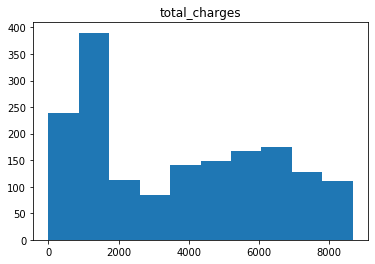

In [30]:
for col in df.columns[1:]:
    plt.hist(df[col])
    plt.title(col)
    plt.show()

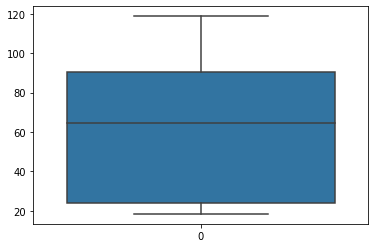

In [31]:
sns.boxplot(data=df.monthly_charges)

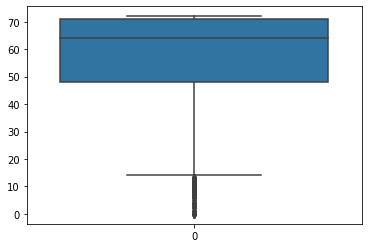

In [32]:
sns.boxplot(data=df.tenure)

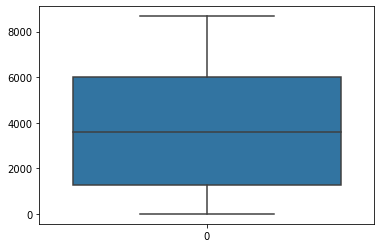

In [33]:
sns.boxplot(data=df.total_charges)

In [34]:
# 3. End with a python file wrangle.py that contains the function, wrangle_telco(), 
# that will acquire the data and return a dataframe cleaned with no missing values.
# def wrangle_telco():
   # df = get_telco2yr_data()
   # df.total_charges = df.total_charges.str.replace(' ', '0').astype(float)
    # add train, validate, test split

In [37]:
telco2yr = wrangle.wrangle_telco()

In [39]:
train.shape, validate.shape, test.shape

((144, 6), (26, 6), (30, 6))